**Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sns.set_style("darkgrid")

**Data collection and analysis**

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isna().sum().sum()

0

In [5]:
# No nulls

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Only taking Annual Income (k$) and Spending Score (1-100)**

In [8]:
x=df.iloc[:,2:4].values

In [9]:
# choosing no of clusters

**wcss -> within cluster sum of squares**

In [10]:
# finding wcss value for different number of clusters

In [11]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[176108.77999999997,
 87121.56591478697,
 59486.96143928035,
 39529.8879673635,
 31674.906249279375,
 25643.265320259467,
 21839.635516285518,
 18808.749269005846,
 16044.79169532817,
 13912.451770855003]

In [13]:
# plotting the elbow graph

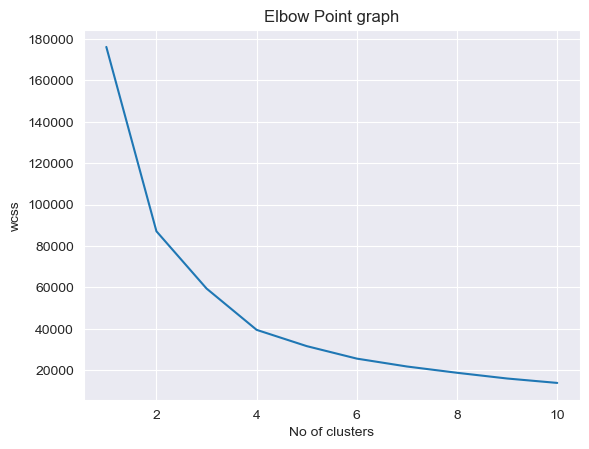

In [14]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Point graph")
plt.xlabel("No of clusters")
plt.ylabel("wcss");

**Thus optimum number of clusters=5**

In [15]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=21)

**Now we need to return a label for each cluster**

In [16]:
y=kmeans.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0
 0 0 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 1 1 3 1 1 1 3 1 1 1 2 1 1 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [17]:
silhouette_score(x,labels=y,metric='euclidean')

0.402727135985239

**Visualising all the data points in centroid and clusters**

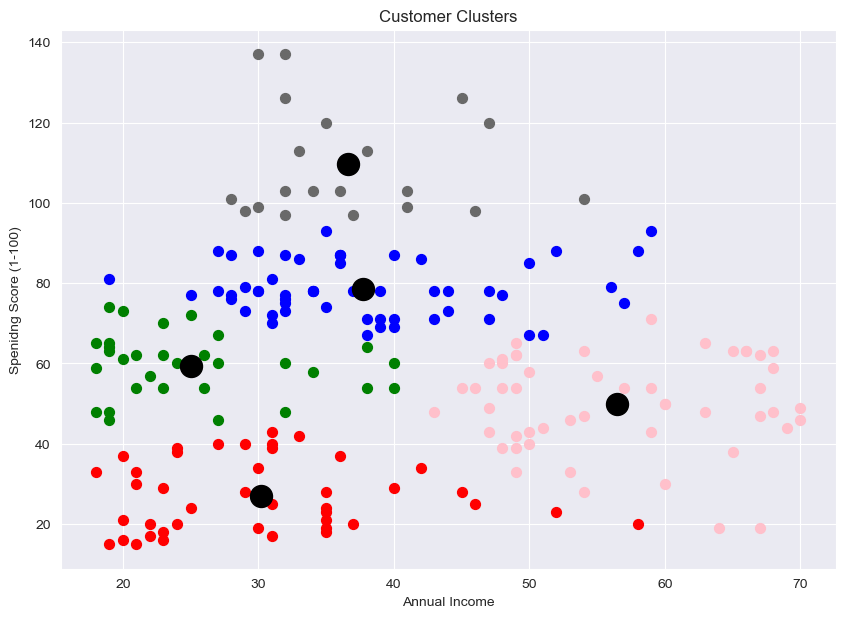

In [18]:
plt.figure(figsize=(10,7))

plt.scatter(x[y==0,0],x[y==0,1],s=50,c='red',label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='blue',label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='pink',label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='green',label='cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='dimgrey',label='cluster5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]
            ,s=250,c='black',label="Centroid")

plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spenidng Score (1-100)");

**Now that our customers are seggregated in different clusters , the team along with domain speefic 
team must collaborate to make marketing strategies to target them differently for maximum output.**